In [111]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [112]:
tcc = pd.read_excel('data/Telco_customer_churn.xlsx')

# Data Exploration and Cleaning

In [113]:
tcc.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [114]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [115]:
# print the number of rows and columns
print("Number of Rows: ", tcc.shape[0])
print("Number of Columns: ", tcc.shape[1])

Number of Rows:  7043
Number of Columns:  33


In [116]:
tcc.describe().T.style.background_gradient(cmap = 'YlGnBu')

,count,mean,std,min,25%,50%,75%,max
Count,7043.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.000000,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.000000,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.000000,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.000000,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.000000,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.000000,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [117]:
tcc.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [118]:
tcc.isnull().sum().sum()


5174

In [119]:
#as churn reason has 5174 null values, it's better to drop the column
tcc.drop(columns='Churn Reason', inplace = True)

In [120]:
tcc.isnull().sum() #missing values problem solved

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [121]:
# extra code – code to save the figures as high-res PNGs
import os
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

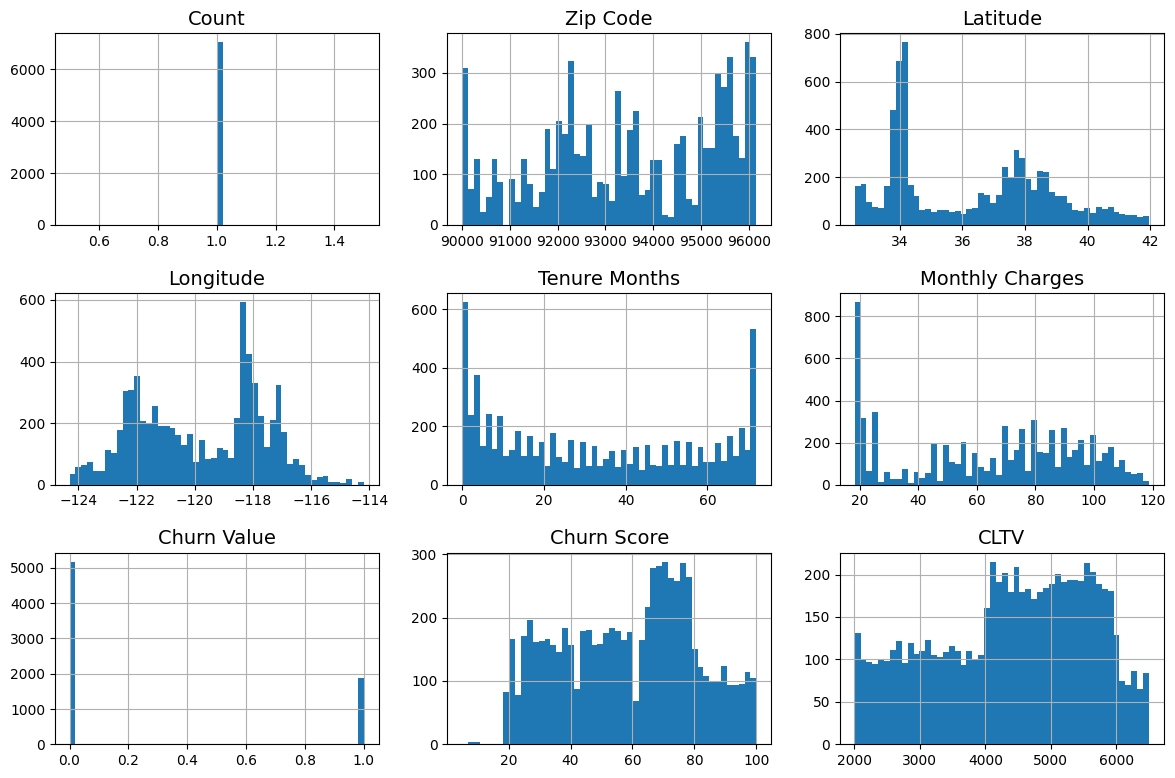

In [122]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

tcc.hist(bins=50, figsize=(12, 8))
save_fig("Attribute_histogram_plots")  # extra code
plt.show()

In [123]:
tcc.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [124]:
# look at the possible values in categorical columns
for col in tcc.columns:
  if(tcc[col].dtype=="O"):
    print(col,": ",tcc[col].unique())

CustomerID :  ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Country :  ['United States']
State :  ['California']
City :  ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Lat Long :  ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Gender :  ['Male' 'Female']
Senior Citizen :  ['No' 'Yes']
Partner :  ['No' 'Yes']
Dependents :  ['No' 'Yes']
Phone Service :  ['Yes' 'No']
Multiple Lines :  ['No' 'Yes' 'No phone service']
Internet Service :  ['DSL' 'Fiber optic' 'No']
Online Security :  ['Yes' 'No' 'No internet service']
Online Backup :  ['Yes' 'No' 'No internet service']
Device Protection :  ['No' 'Yes' 'No internet service']
Tech Support :  ['No' 'Yes' 'No internet service']
Streaming TV :  ['No' 'Yes' 'No internet service']
Streaming Movies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-t

In [125]:
#as the "Total Charges" column is in object format, we can convert it to float
# we used coerce because some object values cannot be converted 
tcc["Total Charges"] = pd.to_numeric(tcc["Total Charges"] , errors = "coerce")

In [126]:
tcc.info() #incorrect entries problem solved ("Total Charges" - object converted to "Total Charges" - float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [127]:
tcc.isnull().sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64

In [128]:
tcc.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [129]:
#handling remaining missing values
# we can see the if we multiply "Tenure Months" by "Monthly Charge", we get the approximate "Total Charge"

tcc["Total Charges"].fillna(tcc["Tenure Months"]*tcc["Monthly Charges"], inplace = True)

#we can replace the missing values with median value but the above procedure is more relavant
# median_value = tcc['Total Charges'].median()
# tcc['Total Charges'].fillna(median_value, inplace=True)

In [130]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [131]:
#outliers problem solving
for col in tcc.columns:
    if tcc[col].dtypes != 'object':
        lower_limit, upper_limit = tcc[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        tcc[col] = np.where(tcc[col]>upper_whisker,upper_whisker,np.where(tcc[col]<lower_whisker,lower_whisker,tcc[col]))

In [132]:
tcc.shape #outliers problem solved 

(7043, 32)

# Feature Engineering and Selection

In [133]:
# look at the possible values in categorical columns
for col in tcc.columns:
  if(tcc[col].dtype=="O"):
    print(col,": ",tcc[col].unique())

CustomerID :  ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Country :  ['United States']
State :  ['California']
City :  ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Lat Long :  ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Gender :  ['Male' 'Female']
Senior Citizen :  ['No' 'Yes']
Partner :  ['No' 'Yes']
Dependents :  ['No' 'Yes']
Phone Service :  ['Yes' 'No']
Multiple Lines :  ['No' 'Yes' 'No phone service']
Internet Service :  ['DSL' 'Fiber optic' 'No']
Online Security :  ['Yes' 'No' 'No internet service']
Online Backup :  ['Yes' 'No' 'No internet service']
Device Protection :  ['No' 'Yes' 'No internet service']
Tech Support :  ['No' 'Yes' 'No internet service']
Streaming TV :  ['No' 'Yes' 'No internet service']
Streaming Movies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-t

In [134]:
tcc.head(15)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1.0,86.0,5372.0
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1.0,89.0,5340.0
5,4190-MFLUW,1.0,United States,California,Los Angeles,90020.0,"34.066367, -118.309868",34.066367,-118.309868,Female,...,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1.0,78.0,5925.0
6,8779-QRDMV,1.0,United States,California,Los Angeles,90022.0,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1.0,100.0,5433.0
7,1066-JKSGK,1.0,United States,California,Los Angeles,90024.0,"34.066303, -118.435479",34.066303,-118.435479,Male,...,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1.0,92.0,4832.0
8,6467-CHFZW,1.0,United States,California,Los Angeles,90028.0,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1.0,77.0,5789.0
9,8665-UTDHZ,1.0,United States,California,Los Angeles,90029.0,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,1.0,97.0,2915.0


In [135]:
tcc.columns #there exists some unnecessary column

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [136]:
tcc.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

# Feature Engineering

In [137]:
#drop unnecessary columns
#"CustomerID" , "Count" , "Country" , "State", "City" ,"Zip Code", "Lat Long" , "Latitude" , "Longitude" do not contain relevant information to predict the Churn Value
#"Churn Label is as similar as Churn Value"
tcc.drop(columns = ["CustomerID" , "Count" , "Country" , "State", "City" ,"Zip Code", "Lat Long" , "Latitude" , "Longitude", "Churn Label"] , inplace = True)

In [138]:
tcc.shape

(7043, 22)

In [139]:
# look at the possible values in categorical columns
for col in tcc.columns:
  if(tcc[col].dtype=="O"):
    print(col,": ",tcc[col].unique())

Gender :  ['Male' 'Female']
Senior Citizen :  ['No' 'Yes']
Partner :  ['No' 'Yes']
Dependents :  ['No' 'Yes']
Phone Service :  ['Yes' 'No']
Multiple Lines :  ['No' 'Yes' 'No phone service']
Internet Service :  ['DSL' 'Fiber optic' 'No']
Online Security :  ['Yes' 'No' 'No internet service']
Online Backup :  ['Yes' 'No' 'No internet service']
Device Protection :  ['No' 'Yes' 'No internet service']
Tech Support :  ['No' 'Yes' 'No internet service']
Streaming TV :  ['No' 'Yes' 'No internet service']
Streaming Movies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'Two year' 'One year']
Paperless Billing :  ['Yes' 'No']
Payment Method :  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [140]:
tcc.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

## Spliting Independent And Dependent features

In [141]:
X=tcc.drop('Churn Value',axis=1)
y=tcc['Churn Value']
X

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV
0,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,86.0,3239.0
1,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,67.0,2701.0
2,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,86.0,5372.0
3,Female,No,Yes,Yes,28.0,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,84.0,5003.0
4,Male,No,No,Yes,49.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,89.0,5340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72.0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,45.0,5306.0
7039,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,59.0,2140.0
7040,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,71.0,5560.0
7041,Female,No,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,59.0,2793.0


In [142]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    0.0
7042    0.0
Name: Churn Value, Length: 7043, dtype: float64

In [143]:
numeric_columns = X.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

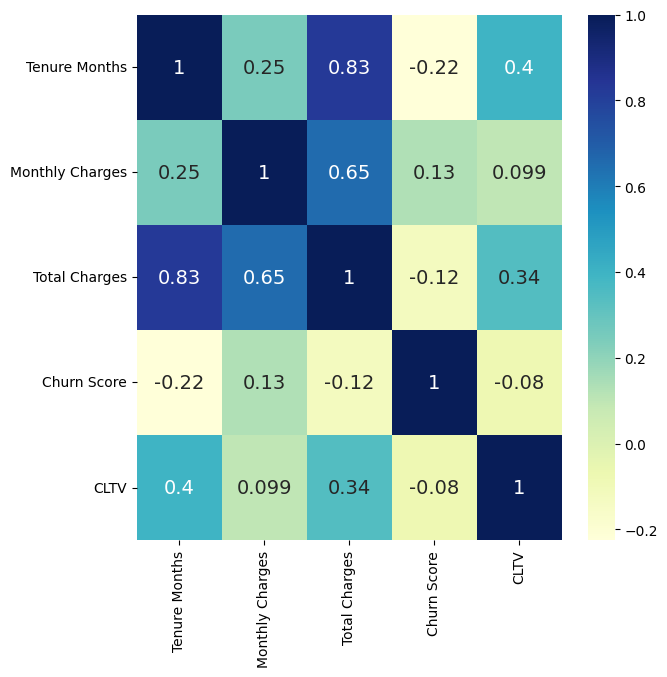

In [144]:
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
save_fig('correlation')
plt.show()

In [145]:
tcc.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

In [146]:
#Tenure Months and Total Charges is highly correlated so we can drop one of the columns
#we will drop total charges table
# feature selection 
tcc.drop(columns = ["Total Charges"] , inplace = True)

## Stratified Train Test Split Data

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [148]:
tcc.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64

## Scaling Numerical Values

In [149]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']
scaler = MinMaxScaler()

# Fit and transform on Train Set and only transform on Test Set
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


print(X_train)
print(X_test)

      Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
4626    Male             No      No         No       0.486111            No   
4192    Male             No     Yes        Yes       0.208333           Yes   
5457    Male             No     Yes        Yes       0.180556            No   
4717  Female             No     Yes         No       0.361111           Yes   
4673    Male             No     Yes        Yes       0.013889           Yes   
...      ...            ...     ...        ...            ...           ...   
6507  Female             No     Yes         No       0.986111           Yes   
1646    Male             No      No         No       0.027778           Yes   
1222  Female            Yes      No         No       0.347222           Yes   
3870  Female             No     Yes         No       0.333333           Yes   
6017    Male             No      No         No       0.083333           Yes   

        Multiple Lines Internet Service      Online

In [150]:
# look at the possible values in categorical columns
for col in tcc.columns:
  if(tcc[col].dtype=="O"):
    print(col,": ",tcc[col].unique())
    

Gender :  ['Male' 'Female']
Senior Citizen :  ['No' 'Yes']
Partner :  ['No' 'Yes']
Dependents :  ['No' 'Yes']
Phone Service :  ['Yes' 'No']
Multiple Lines :  ['No' 'Yes' 'No phone service']
Internet Service :  ['DSL' 'Fiber optic' 'No']
Online Security :  ['Yes' 'No' 'No internet service']
Online Backup :  ['Yes' 'No' 'No internet service']
Device Protection :  ['No' 'Yes' 'No internet service']
Tech Support :  ['No' 'Yes' 'No internet service']
Streaming TV :  ['No' 'Yes' 'No internet service']
Streaming Movies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'Two year' 'One year']
Paperless Billing :  ['Yes' 'No']
Payment Method :  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Handling Catergorical Data

In [151]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_scale = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                     'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                     'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


ordinal_encoder = OrdinalEncoder()
X_train[columns_to_scale] = ordinal_encoder.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = ordinal_encoder.transform(X_test[columns_to_scale])

print(X_train)
print(X_test)

      Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
4626     1.0             0.0      0.0         0.0       0.486111   
4192     1.0             0.0      1.0         1.0       0.208333   
5457     1.0             0.0      1.0         1.0       0.180556   
4717     0.0             0.0      1.0         0.0       0.361111   
4673     1.0             0.0      1.0         1.0       0.013889   
...      ...             ...      ...         ...            ...   
6507     0.0             0.0      1.0         0.0       0.986111   
1646     1.0             0.0      0.0         0.0       0.027778   
1222     0.0             1.0      0.0         0.0       0.347222   
3870     0.0             0.0      1.0         0.0       0.333333   
6017     1.0             0.0      0.0         0.0       0.083333   

      Phone Service  Multiple Lines  Internet Service  Online Security  \
4626            0.0             1.0               0.0              0.0   
4192            1.0             0.0

## Feature Selection using Information Gain

In [152]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info

array([0.00211454, 0.01520977, 0.01829724, 0.02873017, 0.06802868,
       0.01128916, 0.        , 0.05578557, 0.06163883, 0.04622902,
       0.04619161, 0.07160789, 0.0326794 , 0.02962149, 0.09310475,
       0.01779156, 0.05558959, 0.04579966, 0.03806879, 0.36626921,
       0.0006548 ])

In [153]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Churn Score          0.366269
Contract             0.093105
Tech Support         0.071608
Tenure Months        0.068029
Online Security      0.061639
Internet Service     0.055786
Payment Method       0.055590
Online Backup        0.046229
Device Protection    0.046192
Monthly Charges      0.045800
Total Charges        0.038069
Streaming TV         0.032679
Streaming Movies     0.029621
Dependents           0.028730
Partner              0.018297
Paperless Billing    0.017792
Senior Citizen       0.015210
Phone Service        0.011289
Gender               0.002115
CLTV                 0.000655
Multiple Lines       0.000000
dtype: float64

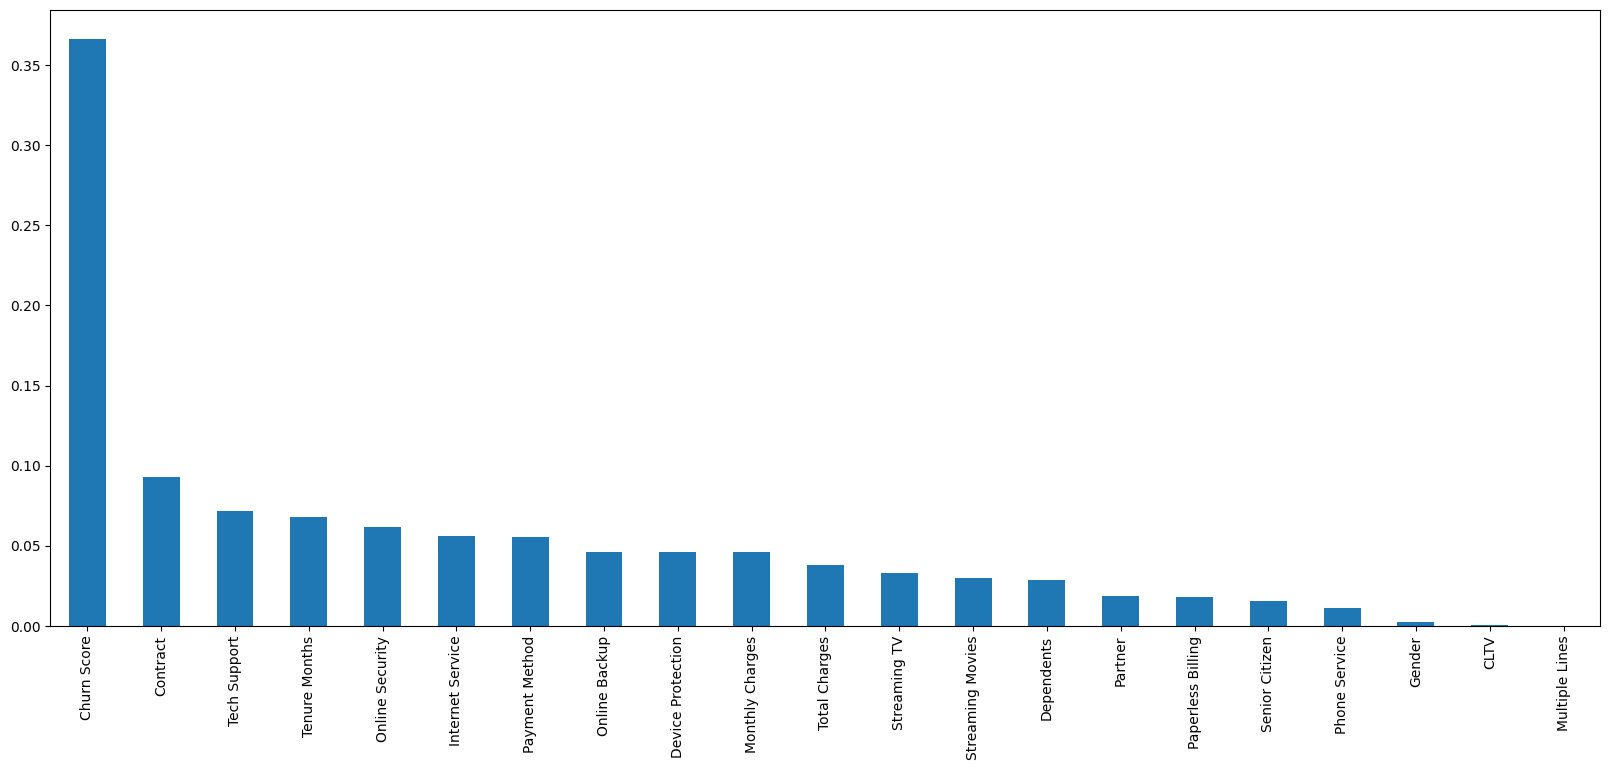

In [154]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [155]:
# CLTV and Multiple Lines columns is less important feature 
# We can drop this two columns
X_train.drop(columns = ["CLTV"] , inplace = True)
X_train.drop(columns = ["Multiple Lines"] , inplace = True)

X_test.drop(columns = ["CLTV"] , inplace = True)
X_test.drop(columns = ["Multiple Lines"] , inplace = True)

# Model Building and Validation

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [157]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier()

In [158]:
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [159]:
y_pred = logreg.predict(X_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_test)
print('Decision Tree Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_test)
print('Random Forest ClassifierTest Accuracy ', accuracy_score(y_test, y_pred ))

Logistic Regression Test Accuracy  0.8687012065294535
Decision Tree Classifier Test Accuracy  0.8970901348474095
Random Forest ClassifierTest Accuracy  0.9254790631653655


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

columns_to_scale = ['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']
scaler = MinMaxScaler()

# Fit and transform on Train Set and only transform on Test Set
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

columns_to_scale = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                     'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                     'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

ordinal_encoder = OrdinalEncoder()

# Fit and transform on Train Set and only transform on Test Set
X_train[columns_to_scale] = ordinal_encoder.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = ordinal_encoder.transform(X_test[columns_to_scale])

print(X_train)
print(X_test)



      Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
4626     1.0             0.0      0.0         0.0       0.486111   
4192     1.0             0.0      1.0         1.0       0.208333   
5457     1.0             0.0      1.0         1.0       0.180556   
4717     0.0             0.0      1.0         0.0       0.361111   
4673     1.0             0.0      1.0         1.0       0.013889   
...      ...             ...      ...         ...            ...   
6507     0.0             0.0      1.0         0.0       0.986111   
1646     1.0             0.0      0.0         0.0       0.027778   
1222     0.0             1.0      0.0         0.0       0.347222   
3870     0.0             0.0      1.0         0.0       0.333333   
6017     1.0             0.0      0.0         0.0       0.083333   

      Phone Service  Multiple Lines  Internet Service  Online Security  \
4626            0.0             1.0               0.0              0.0   
4192            1.0             0.0

## K Fold Cross Validation

In [161]:
from sklearn.model_selection import KFold, cross_val_score
kfold_validation = KFold(n_splits = 10)
clf = DecisionTreeClassifier(random_state=0)
# clf.fit(X_train, y_train)
results = cross_val_score(clf, X_test, y_test, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))



[0.91489362 0.90780142 0.88652482 0.90070922 0.87943262 0.92198582
 0.88652482 0.93617021 0.91489362 0.88571429]

Results =  0.9034650455927051 +/- 0.01779567121073021


In [162]:
kfold_validation = KFold(n_splits = 10)
clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
results = cross_val_score(clf, X_test, y_test, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))


[0.91489362 0.90780142 0.95035461 0.92907801 0.92198582 0.95744681
 0.92198582 0.9787234  0.94326241 0.91428571]

Results =  0.9339817629179332 +/- 0.021578178159572674


## Hyperparameter Tuning using Grid Search

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grids for each classifier
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_rf = {
    'n_estimators': [20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Perform grid search for each classifier
classifiers = [
    ("Logistic Regression", logreg, param_grid_logreg),
    ("Decision Tree", dt, param_grid_dt),
    ("Random Forest", rf, param_grid_rf)
]

for classifier in classifiers:
    c_name, clf, param_grid = classifier
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and classification report
    print(f"Classifier: {c_name}")
    print("Best Hyperparameters:", grid_search.best_params_)
    grid_search.best_estimator_
    
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    
    print("Training Set:")
    print(accuracy_score(y_train, y_train_pred))
    
    print("Test Set:")
    print(accuracy_score(y_test, y_test_pred))
    
    print()

Classifier: Logistic Regression
Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Training Set:
0.9236776712815051
Test Set:
0.9190915542938254

Classifier: Decision Tree
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Set:
0.9245651402200923
Test Set:
0.9226401703335699

Classifier: Random Forest
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
Training Set:
0.9568690095846646
Test Set:
0.9318665720369056



In [183]:
logreg = LogisticRegression(C = 10, max_iter = 100, penalty = 'l1', solver = 'liblinear')
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
rf = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 20)

In [184]:
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=20)

In [185]:
y_pred = logreg.predict(X_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_test)
print('Decision Tree Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_test)
print('Random Forest ClassifierTest Accuracy ', accuracy_score(y_test, y_pred ))

Logistic Regression Test Accuracy  0.9205110007097232
Decision Tree Classifier Test Accuracy  0.9226401703335699
Random Forest ClassifierTest Accuracy  0.9389638041163946


# Model Evaluation

In [186]:
def plot_classification_report(y_train, y_pred1, y_test, y_pred2, c_name):
    print("-"*25,c_name,"(TRAIN SET)","-"*25)
    print(classification_report(y_train, y_pred1))
    print("-"*25,c_name,"(Test SET)","-"*25)
    print(classification_report(y_test, y_pred2))

In [187]:
c_name= "Logistic Regression"
plot_classification_report(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), c_name)

c_name= "Decision Tree"
plot_classification_report(y_train, dt.predict(X_train), y_test, dt.predict(X_test), c_name)

c_name= "Random Forest"
plot_classification_report(y_train, rf.predict(X_train), y_test, rf.predict(X_test), c_name)



------------------------- Logistic Regression (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      4139
         1.0       0.86      0.85      0.85      1495

    accuracy                           0.92      5634
   macro avg       0.90      0.90      0.90      5634
weighted avg       0.92      0.92      0.92      5634

------------------------- Logistic Regression (Test SET) -------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1035
         1.0       0.84      0.86      0.85       374

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

------------------------- Decision Tree (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95   

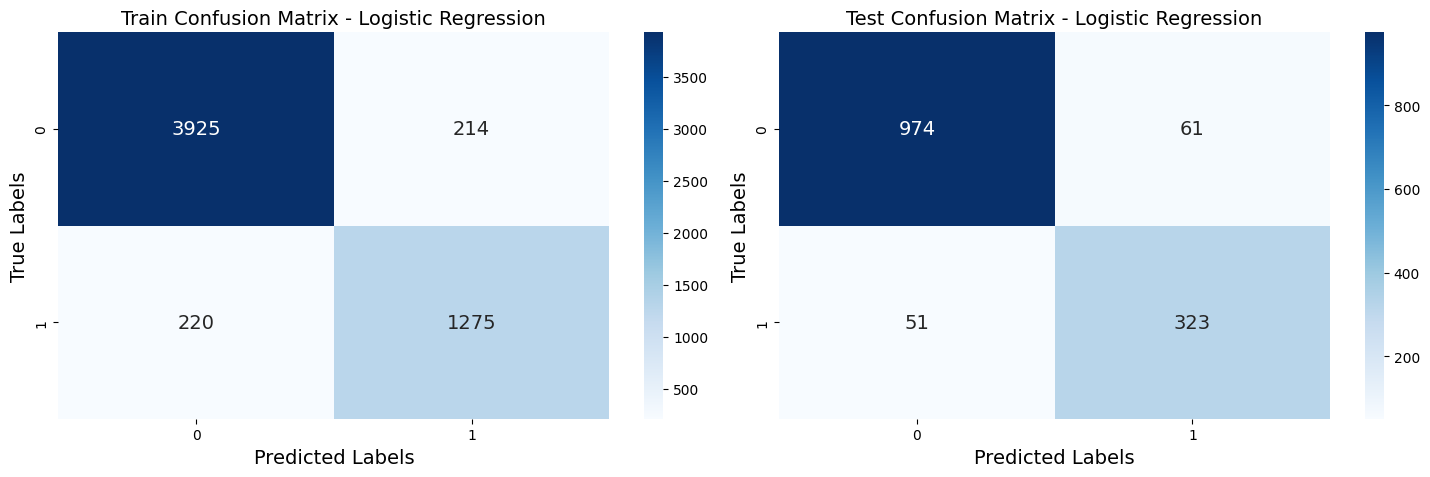

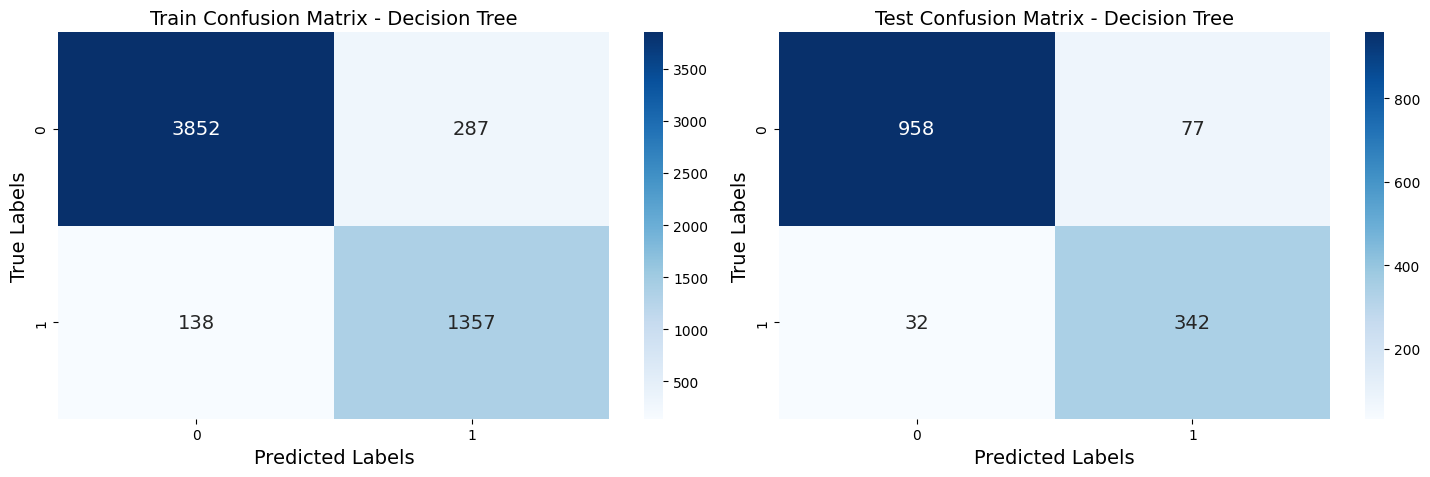

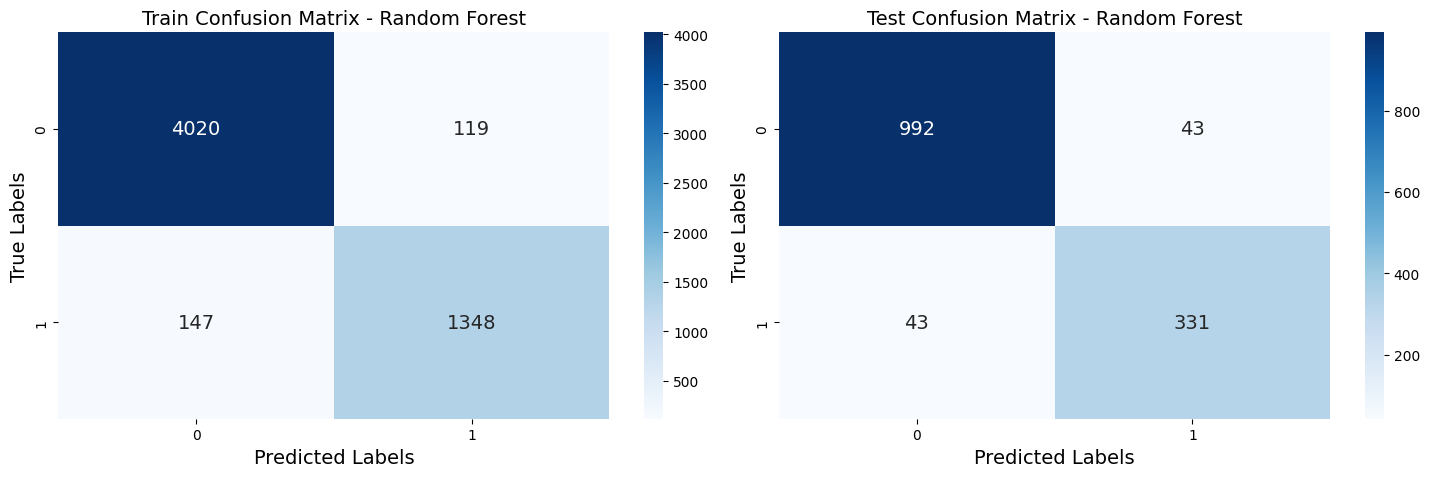

In [188]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_train_true, y_train_pred, y_test_true, y_test_pred, classifier_name):
    train_cm = confusion_matrix(y_train_true, y_train_pred)
    test_cm = confusion_matrix(y_test_true, y_test_pred)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Train Confusion Matrix
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title(f'Train Confusion Matrix - {classifier_name}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Test Confusion Matrix
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title(f'Test Confusion Matrix - {classifier_name}')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    
    plt.tight_layout()
    save_fig(classifier_name+"_cm")  # extra code
    plt.show()

# Generate confusion matrix for each classifier

plot_confusion_matrix(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), "Logistic Regression")
plot_confusion_matrix(y_train, dt.predict(X_train), y_test, dt.predict(X_test), "Decision Tree")
plot_confusion_matrix(y_train, rf.predict(X_train), y_test, rf.predict(X_test), "Random Forest")



## AUC Score and ROC Curve 

In [192]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

pred_prob1 = logreg.predict_proba(X_test)[:, 1]
pred_prob2 = dt.predict_proba(X_test)[:, 1]
pred_prob3 = rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3, pos_label=1)



In [193]:
# Calculate AUC scores
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc1, roc_auc2, roc_auc3)



0.9744891368932289 0.9793523469994058 0.9782957451755406


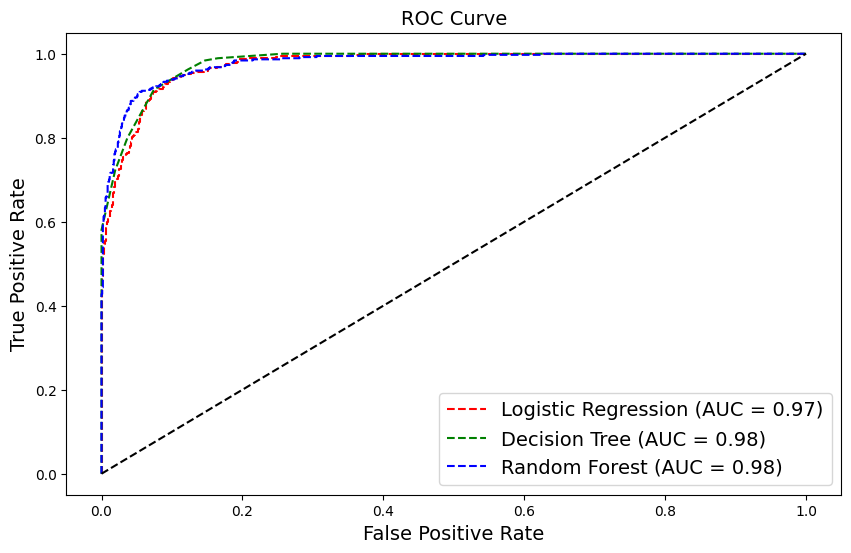

In [194]:
# Plot ROC curves
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree (AUC = {:.2f})'.format(roc_auc2))
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest (AUC = {:.2f})'.format(roc_auc3))
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


## Comprehensive summary 

### From the model evaluation, we can see that out of 3 machine learning algorithms, Random Forest provides the highest accuracy for predicting the number of churn customers, **94%** after hyper-tuning the parameters. Before hyper-tuning, it was 92%. of the ROC and AUC scores; we can also interpret that both the **Decision Tree** and **Random forest** algorithms are efficient in predicting future churn values. We can state from the overall evaluation outcomes that **Random Forest** performs slightly better than the other two algorithms.

# Bonus

In [220]:
tcc = pd.read_excel('data/Telco_customer_churn.xlsx')

In [221]:
columns_to_copy = ['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude','Churn Score']

# Create a new DataFrame with selected columns
ntcc = tcc[columns_to_copy].copy()

# Display the new DataFrame
print(ntcc)


            Country       State          City  Zip Code  \
0     United States  California   Los Angeles     90003   
1     United States  California   Los Angeles     90005   
2     United States  California   Los Angeles     90006   
3     United States  California   Los Angeles     90010   
4     United States  California   Los Angeles     90015   
...             ...         ...           ...       ...   
7038  United States  California       Landers     92285   
7039  United States  California      Adelanto     92301   
7040  United States  California         Amboy     92304   
7041  United States  California  Angelus Oaks     92305   
7042  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Churn Score  
0     33.964131, -118.272783  33.964131 -118.272783           86  
1      34.059281, -118.30742  34.059281 -118.307420           67  
2     34.048013, -118.293953  34.048013 -118.293953           86  
3     34.062125, -118.3

In [222]:
ntcc.columns

Index(['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Churn Score'],
      dtype='object')

In [223]:
X=ntcc.drop('Churn Score',axis=1)
y=ntcc['Churn Score']

In [224]:
X.nunique()

Country         1
State           1
City         1129
Zip Code     1652
Lat Long     1652
Latitude     1652
Longitude    1651
dtype: int64

In [225]:
X.drop(columns = ["Country"] , inplace = True)
X.drop(columns = ["State"] , inplace = True)


In [226]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Latitude', 'Longitude']
scaler = MinMaxScaler()

# Fit and transform on Train Set and only transform on Test Set
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


In [227]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_scale = ['City', 'Zip Code', 'Lat Long']

ordinal_encoder = OrdinalEncoder()
X[columns_to_scale] = ordinal_encoder.fit_transform(X[columns_to_scale])

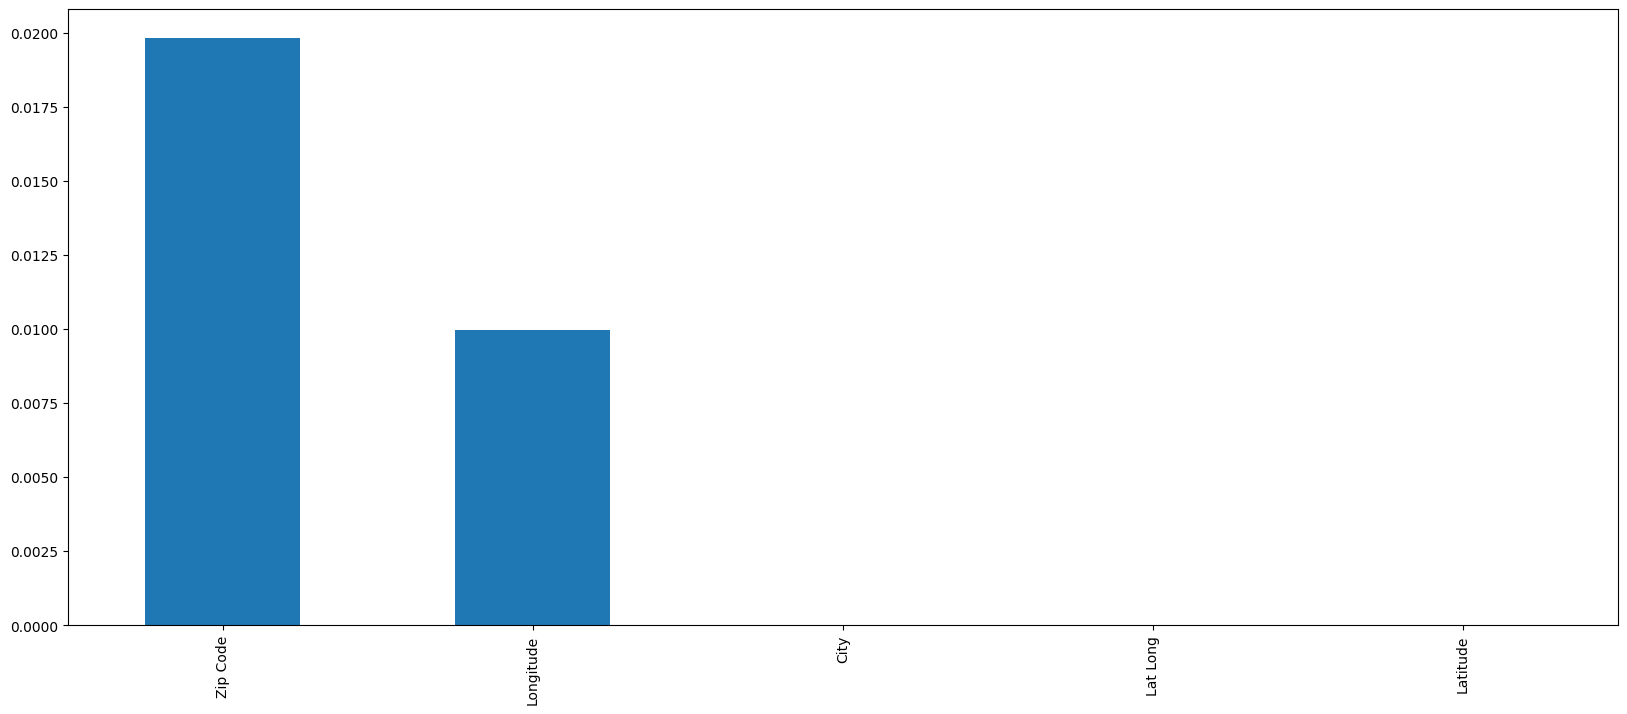

In [228]:
# Feature selection using information gain
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y, random_state = 20)
mutual_info

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [229]:
#As City, Lat Long and Latitude is not affecting the churn score so that we can drop these columns
#Therefore, Zip Code and The Longitude affect higher churn rates in certain areas

X.drop(columns = ["City"] , inplace = True)
X.drop(columns = ["Lat Long"] , inplace = True)
X.drop(columns = ["Latitude"] , inplace = True)